# Predicting Encounter Type from Demographics/Labs

In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.feature_selection import SelectFromModel

In [16]:
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

## Preparing Data for Fitting

In [7]:
data = pd.read_csv("../data/clean/severity_pred_imp.csv")
data.head()

,race,age,hispanic_ind,gender,inpatient,other_acute,result_2951-2,result_2823-3,result_2345-7,result_1975-2,...,result_26464-8,result_26474-7,result_3094-0,result_1742-6,result_26515-7,result_20570-8,result_30385-9,result_33914-3,result_713-8,result_1759-0
0,1,2,0,1,0,1,136.0,4.2,130.696244,0.600997,...,8.228216,3.064976,15.0,45.706972,2.465581e+07,39.201791,14.229859,60.990845,0.100000,1.167055
1,1,62,0,2,1,0,135.0,5.0,179.000000,0.500000,...,8.993176,2.316647,28.0,27.000000,4.874933e+07,38.429301,15.233544,44.954851,0.724309,0.800000
2,1,89,0,1,1,0,127.0,4.6,165.000000,1.200000,...,13.900000,0.600000,37.0,24.000000,2.000000e+02,38.964205,14.797930,50.000000,0.587032,1.000000
3,1,70,0,2,1,0,136.0,4.4,105.000000,0.300000,...,8.043015,2.332100,19.0,100.000000,2.348230e+02,40.122229,14.606879,57.265667,0.764023,1.200000
4,1,54,1,2,1,0,140.0,3.6,271.000000,0.400000,...,7.700525,3.301990,12.0,41.000000,2.512262e+02,40.018621,14.536857,60.764850,0.899450,1.100000


Create target from inpatient and other_acute one hot fields

In [8]:
data['target'] = np.where(data['inpatient'] == 1, 1, 0)
data.groupby(by="target")["target"].count()

target
0    5143
1    7040
Name: target, dtype: int64

In [9]:
features = data.drop(columns = ["inpatient", "other_acute", "target"], inplace = False)
features.head()

,race,age,hispanic_ind,gender,result_2951-2,result_2823-3,result_2345-7,result_1975-2,result_2075-0,result_711-2,...,result_26464-8,result_26474-7,result_3094-0,result_1742-6,result_26515-7,result_20570-8,result_30385-9,result_33914-3,result_713-8,result_1759-0
0,1,2,0,1,136.0,4.2,130.696244,0.600997,102.0,0.000000,...,8.228216,3.064976,15.0,45.706972,2.465581e+07,39.201791,14.229859,60.990845,0.100000,1.167055
1,1,62,0,2,135.0,5.0,179.000000,0.500000,96.0,0.055425,...,8.993176,2.316647,28.0,27.000000,4.874933e+07,38.429301,15.233544,44.954851,0.724309,0.800000
2,1,89,0,1,127.0,4.6,165.000000,1.200000,92.0,0.050750,...,13.900000,0.600000,37.0,24.000000,2.000000e+02,38.964205,14.797930,50.000000,0.587032,1.000000
3,1,70,0,2,136.0,4.4,105.000000,0.300000,98.0,0.059903,...,8.043015,2.332100,19.0,100.000000,2.348230e+02,40.122229,14.606879,57.265667,0.764023,1.200000
4,1,54,1,2,140.0,3.6,271.000000,0.400000,103.0,0.065490,...,7.700525,3.301990,12.0,41.000000,2.512262e+02,40.018621,14.536857,60.764850,0.899450,1.100000


In [10]:
target = data['target']
target.head()

0    0
1    1
2    1
3    1
4    1
Name: target, dtype: int32

In [11]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

## Logistic Regression

In [17]:
steps = [('scaler', StandardScaler()),
         ('logistic', LogisticRegression(solver = 'lbfgs'))]

pipeline = Pipeline(steps)

pipeline.fit(x_train, y_train)

print("Logistic Regression Accuracy: {}".format(pipeline.score(x_test, y_test)))

Logistic Regression Accuracy: 0.7353906762967827


In [18]:
clf = pipeline.named_steps['logistic']

In [19]:
feature_importance = pd.DataFrame({'lab': features.columns, 'val': clf.coef_[0]})
feature_importance.sort_values(by="val", ascending = False)

,lab,val
26,result_26515-7,4.928051
13,result_2885-2,3.008090
22,result_26464-8,0.489127
24,result_3094-0,0.483383
12,result_1920-8,0.461756
18,result_26444-0,0.325576
1,age,0.309647
28,result_30385-9,0.214970
7,result_1975-2,0.197870
4,result_2951-2,0.157356


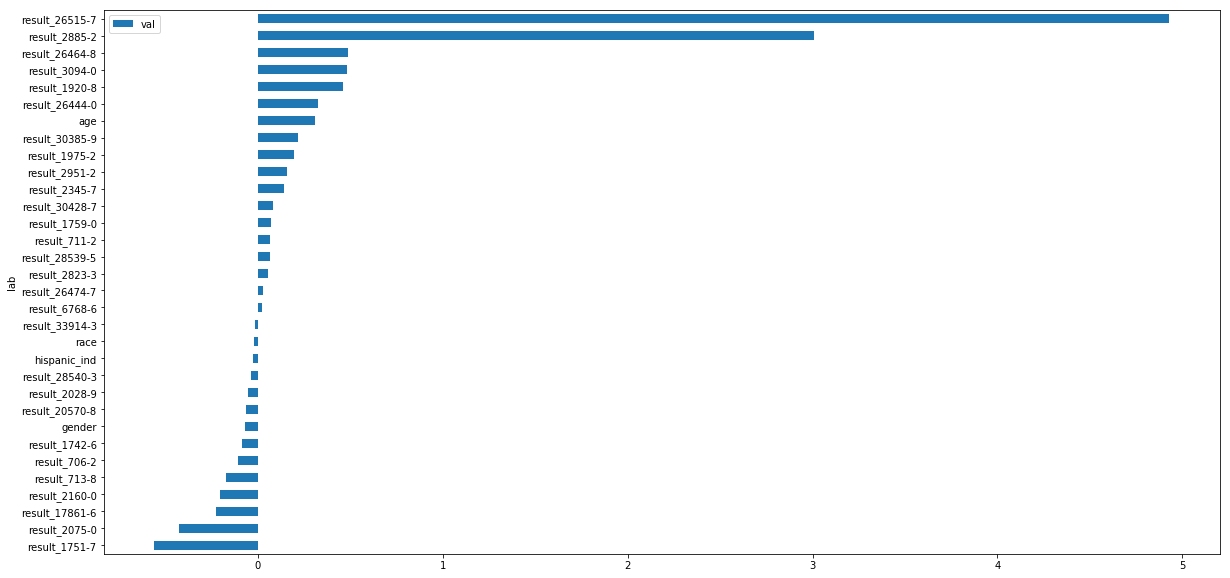

In [20]:
_ = feature_importance.sort_values(by="val").plot.barh(x='lab', y='val')

Top 5 features according to Logistic Regression:
* 26515-7: Blood platelets
* 2885-2: Protein in Serum or Plasma
* 26464-8: Leukocytes in blood
* 3094-0: Urea nitrogen in Serum or Plasma
* 1920-8: Aspartate aminotransferase in Serum or Plasma

Albumin (1751-7) had the largest negative coefficient, meaning increase in the likelihood for other-acute (ED/obs), followed by Chloride in Serum/Plasma (2075-0)

## Random Forest

In [21]:
steps = [('scaler', StandardScaler()),
         ('tree', RandomForestClassifier(n_estimators = 100))]

pipeline = Pipeline(steps)

pipeline.fit(x_train, y_train)

print("Random Forest Accuracy: {}".format(pipeline.score(x_test, y_test)))

Random Forest Accuracy: 0.7764281024294156


In [22]:
clf2 = pipeline.named_steps['tree']
sel = SelectFromModel(clf2, prefit = True)

In [23]:
"Features selected based on importance: " + ", ".join(features.columns[sel.get_support()])

'Features selected based on importance: age, result_2951-2, result_2345-7, result_1920-8, result_2885-2, result_1751-7, result_2160-0, result_17861-6, result_26464-8, result_26474-7, result_3094-0, result_30385-9, result_33914-3, result_1759-0'

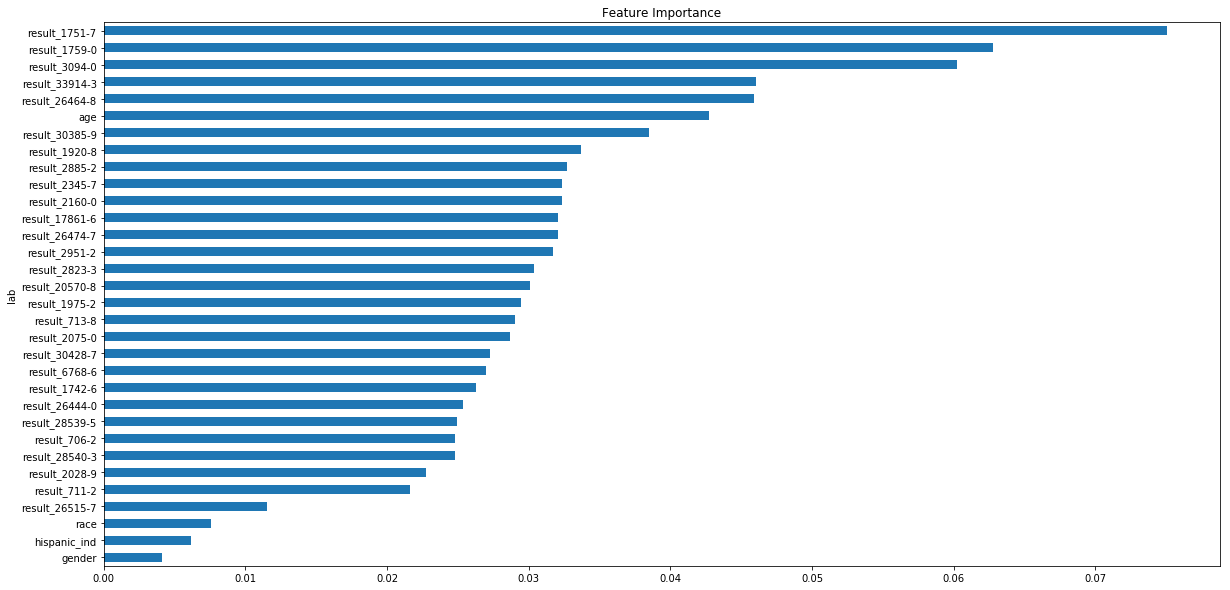

In [25]:
df_bar = pd.DataFrame({'lab': x_train.columns, 'val': sel.estimator.feature_importances_})
ax = df_bar.sort_values(by="val", ascending=True).plot.barh(x='lab', y='val', legend = False, title = "Feature Importance")

Top 5 features according to Random Forest:
* 1751-7: Albumin in Serum/Plasma
* 1759-0: Albumin/Globulin in Serum or Plasma.
* 3094-0: Urea nitrogen in Serum or Plasma
* 33914-3: Glomerular filtration rate in Serum or Plasma by Creatinine-based formula
* 26464-8: Leukocytes in blood

## Support Vector Machine

In [30]:
steps = [('scaler', StandardScaler()),
         ('svc', SVC(kernel = 'linear'))]

pipeline = Pipeline(steps)

pipeline.fit(x_train, y_train)

print("SVM Accuracy: {}".format(pipeline.score(x_test, y_test)))

SVM Accuracy: 0.7426132632961261


In [31]:
clf3 = pipeline.named_steps['svc']

In [32]:
feature_importance = pd.DataFrame({'lab': features.columns, 'val': clf3.coef_[0]})
feature_importance.sort_values(by="val", ascending = False)

,lab,val
26,result_26515-7,6.642971
13,result_2885-2,2.326043
12,result_1920-8,1.103164
22,result_26464-8,0.508648
24,result_3094-0,0.426377
18,result_26444-0,0.337077
1,age,0.259972
28,result_30385-9,0.198150
7,result_1975-2,0.157224
6,result_2345-7,0.123813


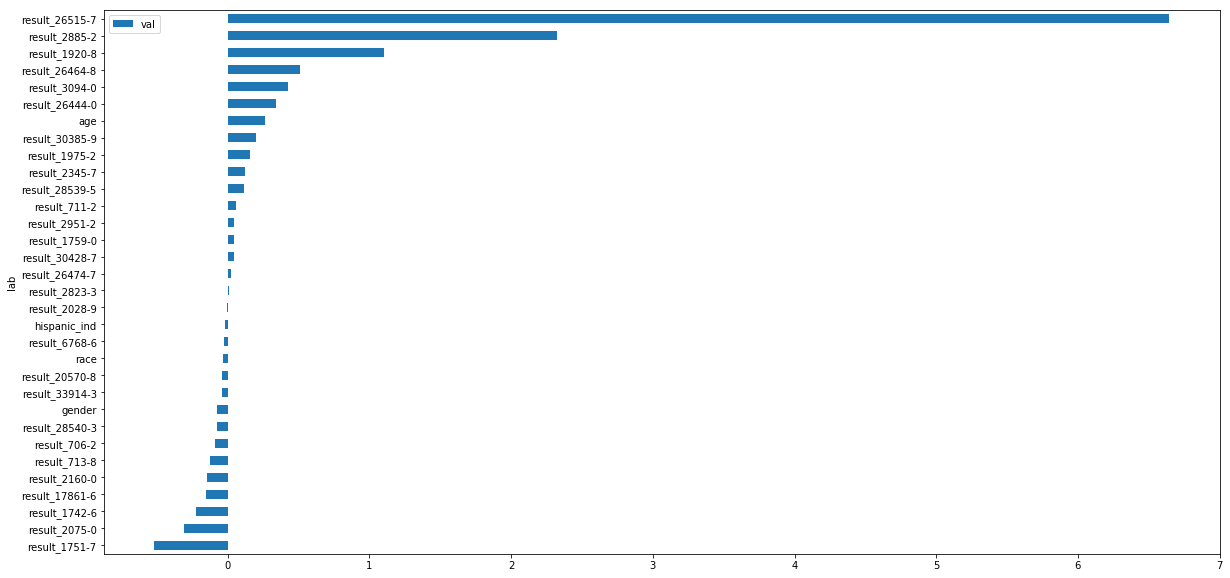

In [33]:
_ = feature_importance.sort_values(by="val").plot.barh(x='lab', y='val')

Top 5 features according to SVM to predict as inpatient:
* 26515-7: Blood platelets
* 2885-2: Protein in Serum or Plasma
* 1920-8: Aspartate aminotransferase in Serum or Plasma
* 26464-8: Leukocytes in blood
* 3094-0: Urea nitrogen in Serum or Plasma

Albumin (1751-7) had the largest negative coefficient, meaning increase in the likelihood for other-acute (ED/obs), followed by Chloride in Serum/Plasma (2075-0)